In [1]:
import pandas as pd

In [3]:
delv = pd.read_csv('delivery_time.csv')

In [4]:
delv.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
print(delv.info())
print(delv.shape)
print()
print(delv.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Delivery Time    21 non-null float64
Sorting Time     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes
None
(21, 2)

       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

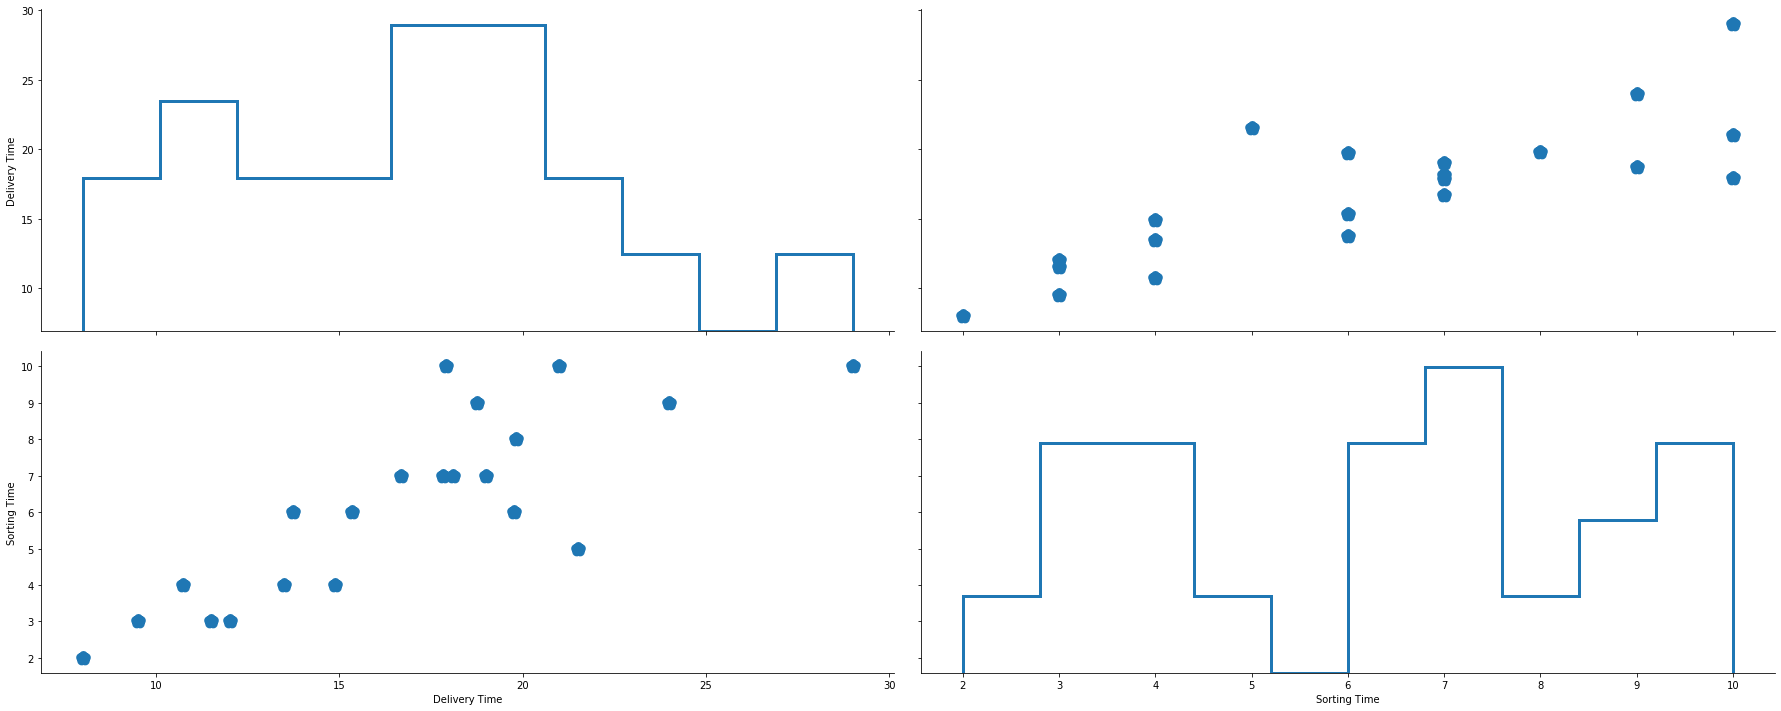

In [52]:
x = sns.PairGrid(delv,height=5,aspect=2.5)
x.map_diag(plt.hist,histtype='step',linewidth=3)
x.map_offdiag(plt.scatter,marker='*',linewidth=9)

plt.show(x)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [81]:
x = np.array([delv['Sorting Time']]).reshape(-1,1)
y = np.array([delv['Delivery Time']]).reshape(-1,1)

In [82]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.8)

In [83]:
reg = LinearRegression()

In [84]:
lr = reg.fit(xTrain,yTrain)

In [85]:
print(lr.intercept_)
print(lr.coef_)

[4.865]
[[1.955]]


In [86]:
yPred = lr.predict(xTest)

In [87]:
preds = pd.DataFrame({'Actual':yTest.flatten(),'Predicted':yPred.flatten()})

In [88]:
from sklearn.metrics import mean_squared_error,r2_score

In [89]:
mse = mean_squared_error(yTest,yPred)
r2 = r2_score(yTest,yPred)

In [90]:
print(mse)
print(r2)

9.98576323529412
0.6077687623083399


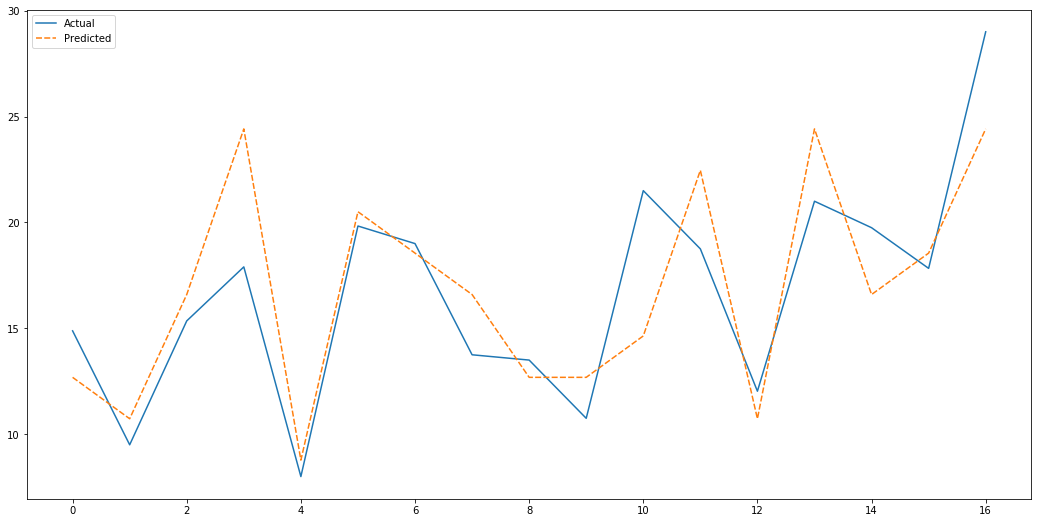

In [94]:
plt.figure(figsize=(18,9))
sns.lineplot(data=preds)
plt.show()